<a href="https://colab.research.google.com/github/mokhatiri/code/blob/main/DMV_USECASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NARSA usecase
Agence nationale de la sécurité routière (NARSA) is developing a new database. Database requirements are revealed in interviews with key staff and review of NARSA documents. The requirements become an ER model in the discovery step of database design.

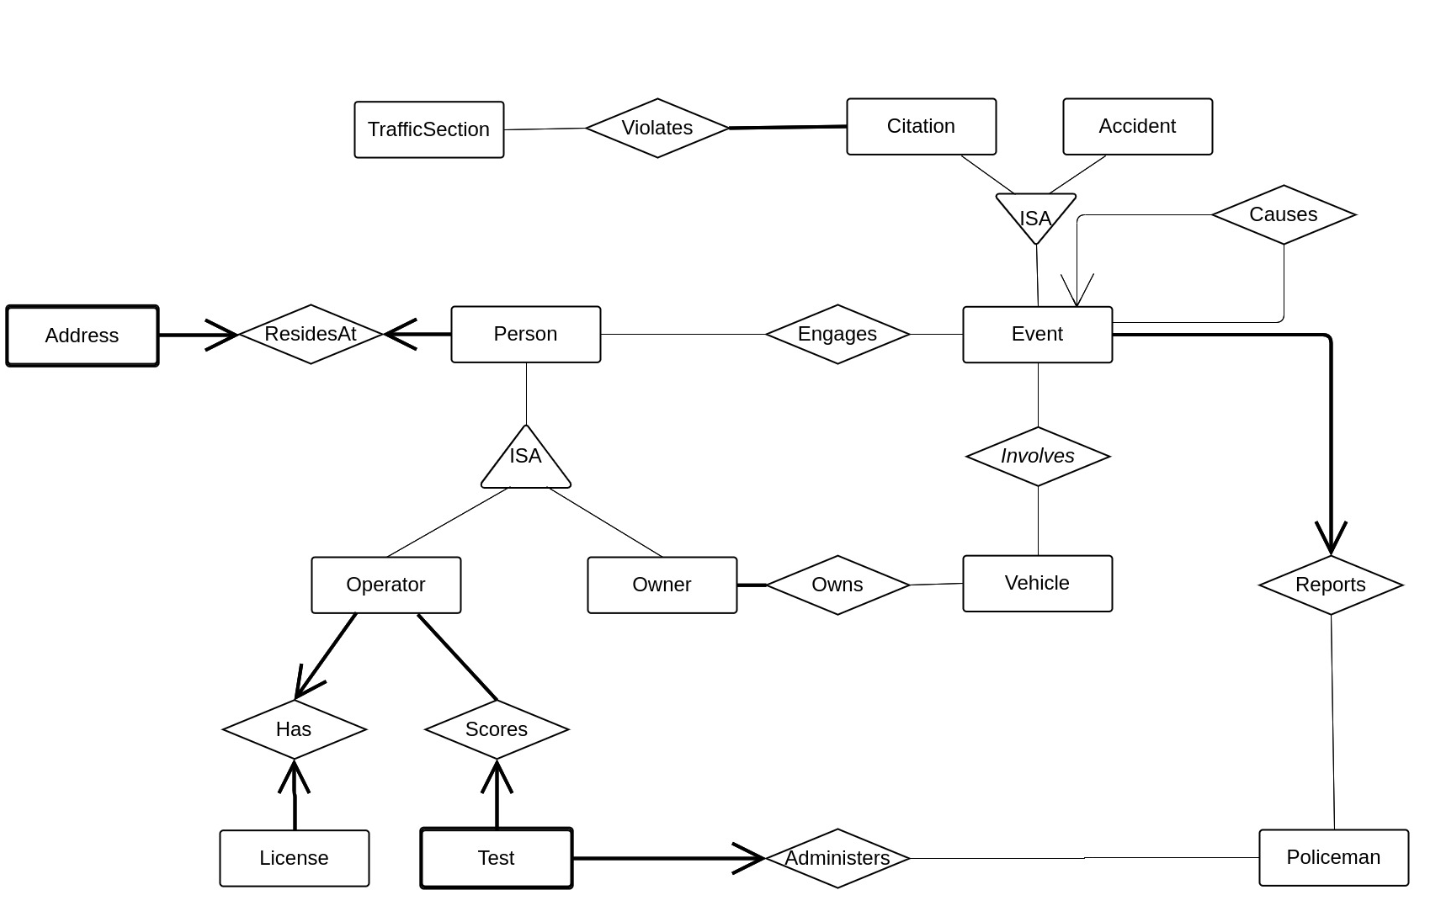

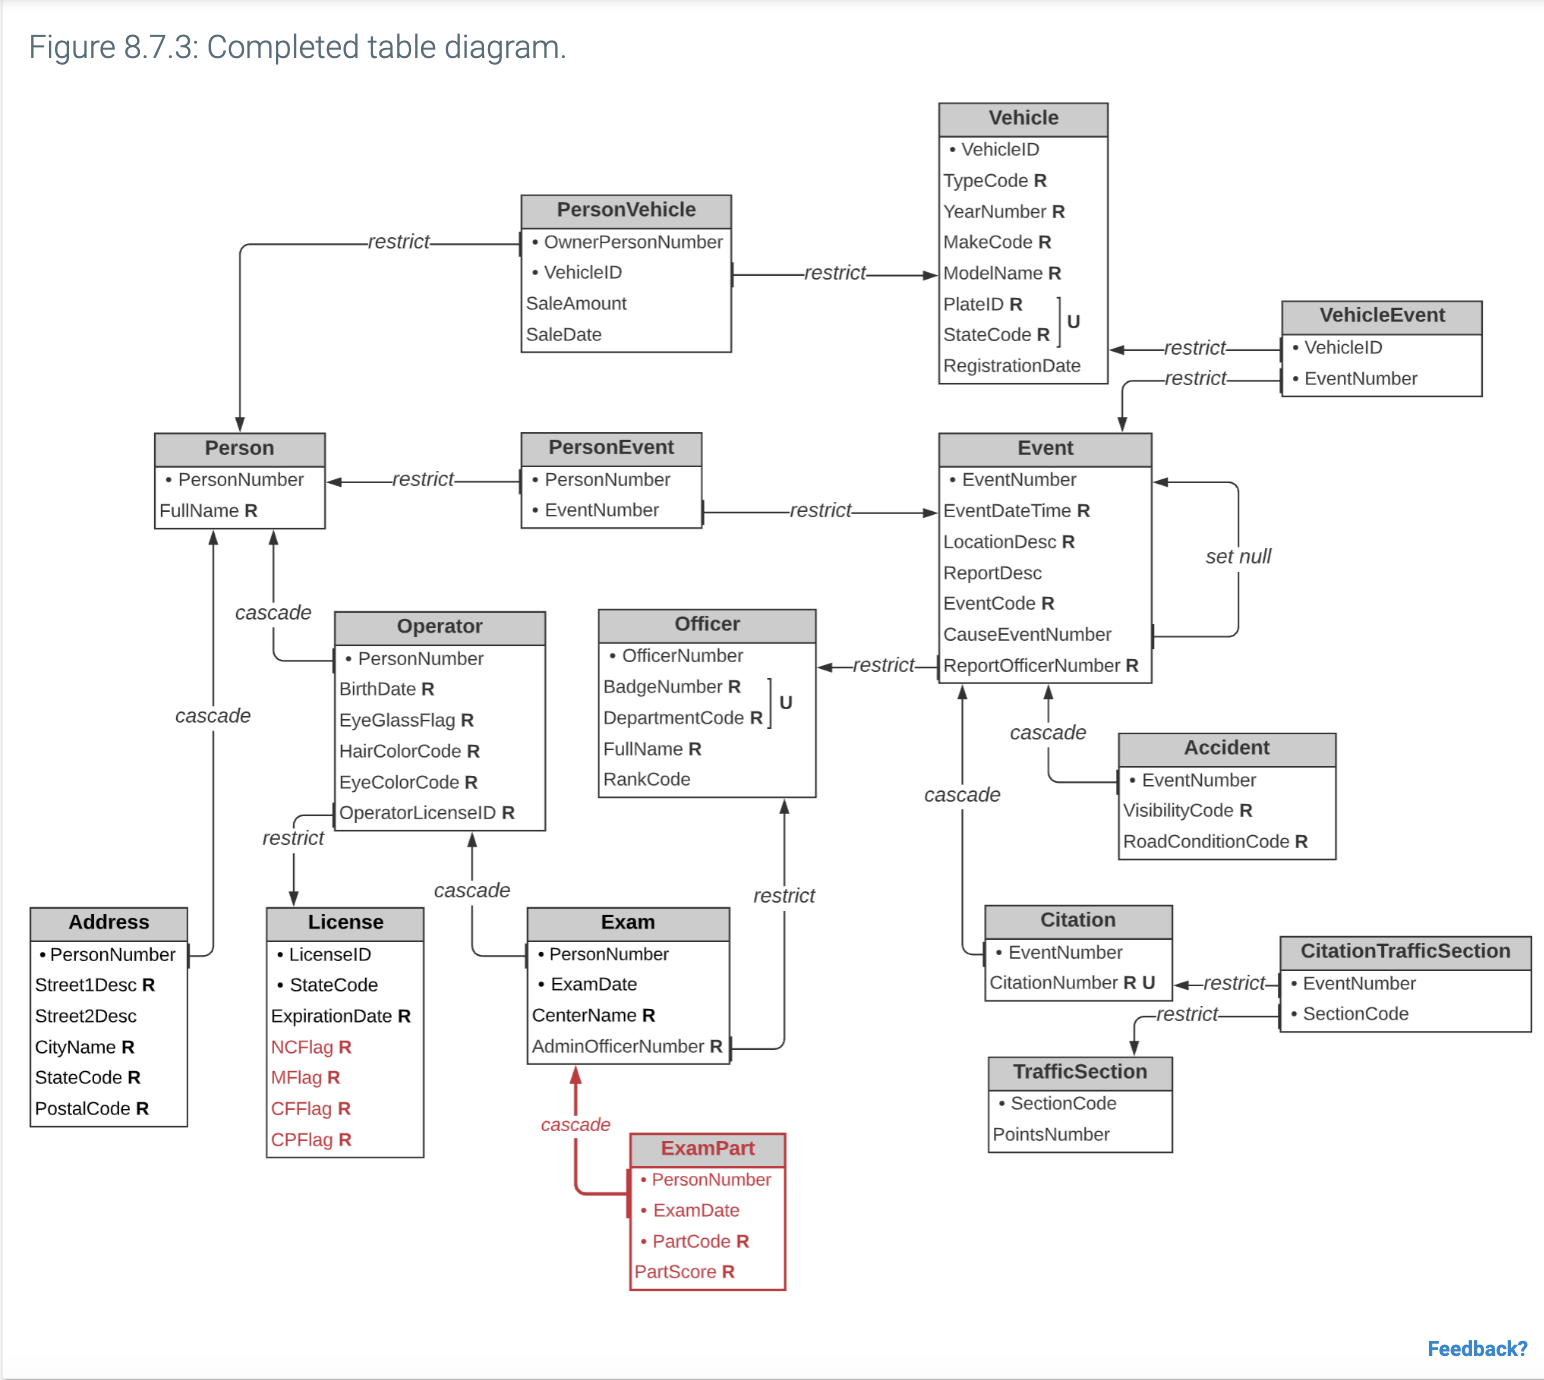

# RUN this cell to load the database

In [ ]:
# @title
import sqlite3
import pandas as pd
db_path = "dmv-database.db"
try :
  import os
  os.remove(db_path)
except :
  pass
# Test
#test

# dummy data
dummy_data = {
    "Person": [
        (1, "Alice Johnson"), (2, "Bob Smith"), (3, "Charlie Brown"), (4, "Diana Prince"), (5, "Eve Adams"),
        (6, "Frank Miller"), (7, "Grace Hopper"), (8, "Hank Pym"), (9, "Ivy Clarke"), (10, "Jack Ryan"),
        (11, "Kelly White"), (12, "Liam Neeson"), (13, "Mona Lisa"), (14, "Nina Simone"), (15, "Oscar Wilde"),
        (16, "Paul Allen"), (17, "Queen Latifah"), (18, "Rick Sanchez"), (19, "Steve Jobs"), (20, "Tom Cruise")
    ],
    "Address": [
        (1, "123 Elm St", "Apt 4", "Metropolis", "CA", "12345"),
        (2, "456 Oak St", "Suite 2", "Gotham", "NY", "54321"),
        (3, "789 Pine St", "", "Star City", "WA", "67890"),
        (4, "101 Maple St", "", "Central City", "IL", "98765"),
        (5, "202 Birch St", "Unit 1", "Smallville", "KS", "24680"),
        (6, "303 Cedar St", "Apt B", "Coast City", "TX", "13579"),
        (7, "404 Spruce St", "", "Midway City", "FL", "11223"),
        (8, "505 Walnut St", "", "Blüdhaven", "PA", "44556"),
        (9, "606 Chestnut St", "Suite 5", "Fawcett City", "OH", "77889"),
        (10, "707 Redwood St", "", "Gateway City", "NV", "99100")
    ],
    "Operator": [
        (1, "1990-01-01", 1, "Brown", "Blue", "12345"),
        (2, "1985-06-15", 0, "Black", "Green", "54321"),
        (3, "1978-09-09", 1, "Blonde", "Blue", "67890"),
        (4, "1992-11-22", 1, "Brown", "Hazel", "98765"),
        (5, "1980-03-03", 0, "Red", "Blue", "24680")
    ],
    "Officer": [
        (1, 1001, "Dept001", "Alice Johnson", "Sergeant"),
        (2, 1002, "Dept002", "Bob Smith", "Lieutenant"),
        (3, 1003, "Dept003", "Charlie Brown", "Captain"),
        (4, 1004, "Dept004", "Diana Prince", "Detective"),
        (5, 1005, "Dept005", "Eve Adams", "Officer")
    ],
    "Vehicle": [
        (1, "Car", 2020, "Toyota", "Camry", "ABC123", "CA", "2021-01-01"),
        (2, "Truck", 2018, "Ford", "F-150", "XYZ789", "NY", "2020-06-15"),
        (3, "SUV", 2022, "Honda", "CR-V", "LMN456", "WA", "2023-07-20"),
        (4, "Bike", 2019, "Harley", "Sportster", "GHJ234", "FL", "2019-09-10"),
        (5, "Car", 2021, "Tesla", "Model 3", "TES123", "CA", "2022-03-05")
    ],
    "Exam": [
        (1, "2023-01-15", "Center A", 1),
        (2, "2023-03-10", "Center B", 2),
        (3, "2023-05-20", "Center A", 3),
        (4, "2023-07-30", "Center C", 4),
        (5, "2023-09-25", "Center B", 5)
    ],
    "ExamPart": [
        (1, "2023-01-15", "Part A", 85),
        (2, "2023-03-10", "Part B", 90),
        (3, "2023-05-20", "Part C", 78),
        (4, "2023-07-30", "Part A", 92),
        (5, "2023-09-25", "Part B", 88)
    ],
    "Citation": [
        (1, 101, "Speeding"),
        (2, 102, "Parking Violation"),
        (3, 101, "Reckless Driving"),
        (4, 103, "Running a Red Light"),
        (5, 101, "Expired Registration")
    ],
    "Event": [
        (101, "2023-01-01 08:00:00", "Downtown", "Speeding Incident", "Code1", "Cause1", 1),
        (102, "2023-02-15 14:30:00", "Uptown", "Parking Issue", "Code2", "Cause2", 2),
        (103, "2023-03-20 18:45:00", "Midtown", "Accident Report", "Code3", "Cause3", 3),
        (104, "2023-04-10 10:00:00", "East Side", "Noise Complaint", "Code4", "Cause4", 4),
        (105, "2023-05-05 16:15:00", "West Side", "Speeding Incident", "Code1", "Cause1", 5)
    ]
}




with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()

    create_statements = {
        "Person": "CREATE TABLE IF NOT EXISTS Person (PersonNumber INTEGER PRIMARY KEY, FullName TEXT);",
        "Address": """CREATE TABLE IF NOT EXISTS Address (
                        PersonNumber INTEGER, Street1Desc TEXT, Street2Desc TEXT,
                        CityName TEXT, StateCode TEXT, PostalCode TEXT);""",
        "Operator": """CREATE TABLE IF NOT EXISTS Operator (
                        PersonNumber INTEGER, BirthDate TEXT, EyeGlassFlag INTEGER,
                        HairColorCode TEXT, EyeColorCode TEXT, OperatorLicenseID TEXT);""",
        "Officer": """CREATE TABLE IF NOT EXISTS Officer (
                        OfficerNumber INTEGER PRIMARY KEY, BadgeNumber INTEGER,
                        DepartmentCode TEXT, FullName TEXT, RankCode TEXT);""",
        "Vehicle": """CREATE TABLE IF NOT EXISTS Vehicle (
                        VehicleID INTEGER PRIMARY KEY, TypeCode TEXT, YearNumber INTEGER,
                        MakeCode TEXT, ModelName TEXT, PlateID TEXT, StateCode TEXT, RegistrationDate TEXT);""",
        "Exam": """CREATE TABLE IF NOT EXISTS Exam (
                    PersonNumber INTEGER, ExamDate TEXT, CenterName TEXT, AdminOfficerNumber INTEGER);""",
        "ExamPart": """CREATE TABLE IF NOT EXISTS ExamPart (
                        PersonNumber INTEGER, ExamDate TEXT, PartCode TEXT, PartScore INTEGER);""",
        "Citation": """CREATE TABLE IF NOT EXISTS Citation (
                        EventNumber INTEGER, CitationNumber INTEGER, ReportDesc TEXT);""",
        "Event": """CREATE TABLE IF NOT EXISTS Event (
                    EventNumber INTEGER PRIMARY KEY, EventDateTime TEXT, LocationDesc TEXT,
                    ReportDesc TEXT, EventCode TEXT, CauseEventNumber TEXT, ReportOfficerNumber INTEGER);"""
    }

    for table_name, create_sql in create_statements.items():
        cursor.execute(create_sql)

    for table_name, data in dummy_data.items():
        placeholders = ", ".join(["?"] * len(data[0]))
        insert_query = f"INSERT INTO {table_name} VALUES ({placeholders});"
        cursor.executemany(insert_query, data)



    cursor.execute("""
    CREATE TABLE IF NOT EXISTS PersonVehicle (
        OwnerPersonNumber INTEGER NOT NULL,
        VehicleID INTEGER NOT NULL,
        SaleAmount REAL,
        SaleDate TEXT,
        FOREIGN KEY (OwnerPersonNumber) REFERENCES Person(PersonNumber),
        FOREIGN KEY (VehicleID) REFERENCES Vehicle(VehicleID)
    );
    """)

    cursor.execute("""
    CREATE TABLE IF NOT EXISTS Accident (
        EventNumber INTEGER NOT NULL,
        VisibilityCode TEXT,
        RoadConditionCode TEXT,
        FOREIGN KEY (EventNumber) REFERENCES Event(EventNumber)
    );
    """)

    cursor.execute("""
    CREATE TABLE IF NOT EXISTS TrafficSection (
        SectionCode INTEGER NOT NULL PRIMARY KEY,
        PointsNumber INTEGER
    );
    """)

    cursor.executemany("""
    INSERT INTO PersonVehicle (OwnerPersonNumber, VehicleID, SaleAmount, SaleDate)
    VALUES (?, ?, ?, ?);
    """, [
        (1, 101, 15000.50, '2023-01-15'),
        (2, 102, 20000.75, '2023-02-20'),
        (3, 103, 18000.00, '2023-03-10'),
        (4, 104, 22000.90, '2023-04-05'),
        (5, 105, 17000.40, '2023-05-30')
    ])

    cursor.executemany("""
    INSERT INTO Accident (EventNumber, VisibilityCode, RoadConditionCode)
    VALUES (?, ?, ?);
    """, [
        (101, 'Clear', 'Dry'),
        (102, 'Foggy', 'Wet'),
        (103, 'Rainy', 'Slippery'),
        (104, 'Snowy', 'Icy'),
        (105, 'Sunny', 'Dry')
    ])

    cursor.executemany("""
    INSERT INTO TrafficSection (SectionCode, PointsNumber)
    VALUES (?, ?);
    """, [
        (1, 2),
        (2, 4),
        (3, 3),
        (4, 5),
        (5, 1)
    ])

    cursor.executemany("""
    INSERT INTO Citation (EventNumber, CitationNumber)
    VALUES (?, ?);
    """, [
        (101, 1),
        (102, 2),
        (103, 3),
        (104, 4),
        (105, 5)
    ])
    conn.commit()
    print("""
      DDDD    AAAAA   TTTTT  AAAAA  BBBBB   AAAAA  SSSSS  EEEEE
      D   D   A   A     T    A   A  B    B  A   A  S       E
      D   D   AAAAA     T    AAAAA  BBBBB   AAAAA  SSSSS   EEEE
      D   D   A   A     T    A   A  B    B  A   A      S   E
      DDDD    A   A     T    A   A  BBBBB   A   A  SSSSS   EEEEE

    DATABASE created! 🐱
    ROWS inserted 🦄
    Happy sqling! 🐢

    Keep calm and SELECT all! 😸
    """)


import pickle

with open("/content/dmv-solutions.pkl", "rb") as f:
    logger = pickle.load(f)


def validate_query_output(student_result, expected_result):
    """
    Validates a student's query output against an expected result.

    Args:
        student_result (pd.DataFrame)
        expected_result (pd.DataFrame)

    Returns:
        None: Prints feedback on the validation.
    """
    try:
        # Step 1: Check if column sets match
        if set(student_result.columns) != set(expected_result.columns):
            print("❌ Column mismatch:")
            print(f"Expected columns: {set(expected_result.columns)}")
            print(f"Your columns: {set(student_result.columns)}")
            return

        # Step 2: Check if lengths match
        if len(student_result) != len(expected_result):
            print("❌ Row count mismatch:")
            print(f"Expected row count: {len(expected_result)}")
            print(f"Your row count: {len(student_result)}")
            return

        # Step 3: Sort both DataFrames for comparison
        sorted_student_result = student_result.sort_values(by=list(student_result.columns)).reset_index(drop=True)
        sorted_expected_result = expected_result.sort_values(by=list(expected_result.columns)).reset_index(drop=True)

        # Step 4: Check first 3 rows
        if not sorted_student_result.head(3).equals(sorted_expected_result.head(3)):
            print("❌ First 3 rows do not match after sorting:")
            print("Expected (first 3 rows):")
            print(sorted_expected_result.head(3))
            print("Your result (first 3 rows):")
            print(sorted_student_result.head(3))
            return

        print("✅ Query is correct!")

    except Exception as e:
        print(f"❌ Error during validation: {e}")




def run_query(sql_query: str, solution_idx:int, db_path: str = db_path) -> pd.DataFrame:
    """
    util to execute SQL queries
    return df
    """
    try:
        conn = sqlite3.connect(db_path)
        df = pd.read_sql_query(sql_query, conn)
        print("----------------------------")
        validate_query_output(df,logger[solution_idx])
        print("----------------------------")
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()
    finally:
        conn.close()



      DDDD    AAAAA   TTTTT  AAAAA  BBBBB   AAAAA  SSSSS  EEEEE
      D   D   A   A     T    A   A  B    B  A   A  S       E
      D   D   AAAAA     T    AAAAA  BBBBB   AAAAA  SSSSS   EEEE
      D   D   A   A     T    A   A  B    B  A   A      S   E
      DDDD    A   A     T    A   A  BBBBB   A   A  SSSSS   EEEEE

    DATABASE created! 🐱
    ROWS inserted 🦄
    Happy sqling! 🐢

    Keep calm and SELECT all! 😸
    


FileNotFoundError: [Errno 2] No such file or directory: '/content/dmv-solutions.pkl'

# SQL queries

# 1. Find all the details of every person in the database.

In [ ]:
# put your query here
run_query("""
SELECT * FROM Person;
""",
solution_idx=0)

----------------------------
✅ Query is correct!
----------------------------


,PersonNumber,FullName
0,1,Alice Johnson
1,2,Bob Smith
2,3,Charlie Brown
3,4,Diana Prince
4,5,Eve Adams
5,6,Frank Miller
6,7,Grace Hopper
7,8,Hank Pym
8,9,Ivy Clarke
9,10,Jack Ryan


# 2. Get the full names of all people in the system.

In [ ]:
run_query("""


""",
solution_idx=1)

----------------------------
✅ Query is correct!
----------------------------


,FullName
0,Alice Johnson
1,Bob Smith
2,Charlie Brown
3,Diana Prince
4,Eve Adams
5,Frank Miller
6,Grace Hopper
7,Hank Pym
8,Ivy Clarke
9,Jack Ryan


# 3. Find the addresses of a person with a specific ID (e.g., PersonNumber = 1).

In [ ]:
run_query("""


""",
solution_idx=2)

# 4. List all vehicles manufactured in a particular year (e.g., 2020).

In [ ]:
# put your query here
run_query("""


""",
solution_idx=3)

# 5. Find all exams that were conducted in a specific center (e.g., 'Center A').

In [ ]:
run_query("""

""",
solution_idx=4)

# 6. Look up the citations related to a specific event (e.g., EventNumber = 101).

In [ ]:
run_query("""

""",
solution_idx=5)

# 7. How many exams has each person taken? Provide the count per person.

In [ ]:
run_query("""

""",
solution_idx=6)

# 8. Who are the operators that wear eyeglasses? List their details.

In [ ]:
run_query("""

""",
solution_idx=7)

# 9. What is the average score for each part of an exam?

In [ ]:
run_query("""

""",
solution_idx=8)

# 10. Calculate the total amount earned from all vehicle sales.

In [ ]:
run_query("""

""",
solution_idx=9)

# 11. What is the highest number of points for any traffic section?

In [ ]:
run_query("""

""",
solution_idx=10)

# 12. How many citations were issued for each event? Provide the counts.

In [ ]:
run_query("""

""",
solution_idx=11)

# 13. Find the names of all people who own at least one vehicle.

In [ ]:
run_query("""

""",
solution_idx=12)

# 14. List the details of all exam parts along with the name of the exam center they belong to.

In [ ]:
run_query("""

""",
solution_idx=13)

# 15. Find the names of officers who reported events in the database.

In [ ]:
run_query("""

""",
solution_idx=14)

# 16. Which three events have the highest number of citations? List the top three.


In [ ]:
run_query("""

""",
solution_idx=15)

# 17. Look up all accidents where visibility codes are recorded, and include the event details.


In [ ]:
run_query("""

""",
solution_idx=16)

# 18. Identify people who have both an operator license and own a vehicle.


In [ ]:
run_query("""

""",
solution_idx=17)

# 19. List all exams that were supervised by an admin officer from a specific department (e.g., 'Dept001').

In [ ]:
run_query("""

""",
solution_idx=18)

# 20. For each person, calculate how many exams they have taken and how many vehicles they own.


In [ ]:
run_query("""

""",
solution_idx=19)

----------------------------
✅ Query is correct!
----------------------------


,FullName,TotalExams,TotalVehicles
0,Alice Johnson,1,1
1,Bob Smith,1,1
2,Charlie Brown,1,1
3,Diana Prince,1,1
4,Eve Adams,1,1
5,Frank Miller,0,0
6,Grace Hopper,0,0
7,Hank Pym,0,0
8,Ivy Clarke,0,0
9,Jack Ryan,0,0
